In [1]:
from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
#device = torch.device(device)
print(f"{device = }")
from torch_geometric.nn import GNNExplainer

    

model = torch.load(
"./results/trained_pytorch_models/Non_masked_Phe/Model_GIN_classifier_to_explain_v2_23-10-2022_15h_00min_best_ValAcc_0.989060731799321_epoch_6.pt")
model.FC2 = torch.nn.Identity()
model.leakyrelu= torch.nn.Identity()

/DeepenData/.miniconda/envs/geo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device = 'cuda:0'


In [12]:
loader_path = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
loader = torch.load(loader_path)
loader_validation = loader.get_validation_loader()
loader_train = loader.get_train_loader()
#a_batch = next(iter(loader_validation)).to(device, non_blocking=True)
model.eval()
device = "cpu"
model.to(device,  non_blocking=True)
cat_outputs = []
labels = []
for a_batch in loader_train:
    output = model(a_batch.x.to(device, non_blocking=True), a_batch.edge_index.to(device, non_blocking=True), a_batch.batch.to(device, non_blocking=True))#.cpu().detach().numpy()
    cat_outputs.append(output)
    labels.append(a_batch.y.cpu().detach().numpy())
    

intermediate_output = torch.cat(cat_outputs).cpu().detach().numpy()


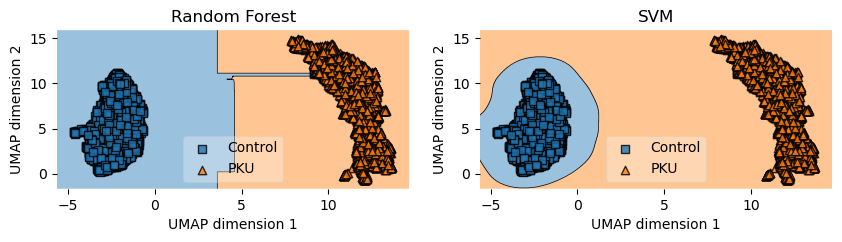

In [20]:
import numpy as np
import umap

def plot_classsifiers(X, y):
    
    clf3 = RandomForestClassifier()
    clf4 = SVC(gamma='auto')

    gs = gridspec.GridSpec(3, 2)
    fig = plt.figure(figsize=(10,7))
    labels = ['Random Forest', 'SVM']
    for clf, lab, grd in zip([clf3, clf4],
                            labels,
                            [(0,0), (0,1)]):
        clf.fit(X, y)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X, y=y, clf=clf)
        
        handles, labels = fig.get_legend_handles_labels()
        ax.legend(handles, 
          ['Control', 'PKU'], 
           framealpha=0.3, scatterpoints=1)
        plt.title(lab)
        plt.xlabel('UMAP dimension 1')
        plt.ylabel('UMAP dimension 2')
    plt.show()


reducer = umap.UMAP()
embedding = reducer.fit_transform(intermediate_output)
plot_classsifiers(embedding, np.array(labels).flatten())
plt.show()

<AxesSubplot:xlabel='0', ylabel='1'>

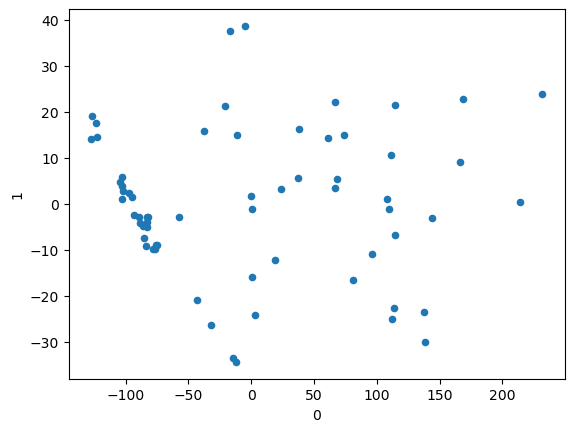